In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class SquareDalitzPlot:
    def __init__(self, M, m1, m2, m3):
        self.M = M
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.m = np.array([self.M, self.m1, self.m2, self.m3])
        self.mSq = np.power(self.m, 2)
        
    def pCalc(self, E, mSq):
        # Calculate momentum of a track, given its energy and mass squared.
        pSq = E**2 - mSq
        if pSq > 0.0:
            return np.sqrt(pSq)
        else:
            return 0.0

    def CfromM(self, mijSq, mikSq, i, j, k):
        """
        *Following the same algorithm as written in Laura++ but converted from C++ to Python*
        
        Routine to calculate the cos(helicity) variables from the masses of the particles.
        
        Definitions:
        theta12 is defined as the angle between 1&3 in the rest frame of 1&2
        theta23 is defined as the angle between 3&1 in the rest frame of 2&3
        theta13 is defined as the angle between 3&2 in the rest frame of 1&3
        """
        mij = np.sqrt(mijSq)
        mik = np.sqrt(mikSq)
        
        EiCmsij = (mijSq - self.mSq[j] + self.mSq[i]) / (2.0 * mij)
        EkCmsij = (self.mSq[0] - mijSq - self.mSq[k]) / (2.0 * mij)
        
        if EiCmsij < m[i]:
            print("WARNING in CfromM: EiCmsij =", EiCmsij, " is too small.")
            return 0.0
        if EkCmsij < m[k]:
            print("WARNING in CfromM: EkCmsij =", EkCmsij, " is too small.")
            return 0.0
    
        # Find track i and k momenta in ij rest frame
        self.qi = self.pCalc(EiCmsij, self.mSq[i])
        self.qk = self.pCalc(EkCmsij, self.mSq[k])
    
        # Find ij helicity angle
        cosHel = -(mikSq - self.mSq[i] - self.mSq[k] - 2.0 * EiCmsij * EkCmsij) / (2.0 * self.qi * self.qk)
    
        if cosHel > 1.0:
            cosHel = 1.0
        elif cosHel < -1.0:
            cosHel = -1.0
    
        return cosHel
    
    def TfromM(self, mijSq, mikSq, i, j, k):
        cosThetaij = self.CfromM(mijSq, mikSq, i, j, k)
        return (1 / np.pi) * np.arccos(cosThetaij)
    
    def MpfromM(self, mijSq, mikSq, i, j, k):
        """
        Routine to calculate m' from mijSq
        """
        mij = np.sqrt(mijSq)
        mij_max = self.m[0] - self.m[k]
        mij_min = self.m[i] + self.m[j]
        
        return (1 / np.pi) * np.arccos(2. * ((mij - mij_min) / (mij_max - mij_min)) - 1.)        

In [4]:
# Convention is m1 = Ks, m2 = pi, m3 = pi
s12Sqs13Sqs23Sq = np.load('../data/B_Kspipi_amp_1e7.npy')

mD  = 1.86483 # GeV
mKs = 0.497611 # GeV
mpi = 0.13957018 # GeV
m = np.array([mD, mKs, mpi, mpi])

SDP = SquareDalitzPlot(mD, mKs, mpi, mpi)

# Convert to square Dalitz plot variables from Dalitz plot variables
mp_thetap = []
for i in tqdm(range(len(s12Sqs13Sqs23Sq)), ncols = 100):
    mp = SDP.MpfromM(s12Sqs13Sqs23Sq[i,0], s12Sqs13Sqs23Sq[i,1], 1, 2, 3)
    thetap = SDP.TfromM(s12Sqs13Sqs23Sq[i,0], s12Sqs13Sqs23Sq[i,1], 1, 2, 3)
    mp_thetap.append(np.array([mp, thetap]))

mp_thetap = np.array(mp_thetap)

100%|███████████████████████████████████████████████| 10000000/10000000 [00:50<00:00, 198070.92it/s]


In [5]:
# Save the square Dalitz plot variable data
np.save('../data/D_Kspipi_SDP_1e7.npy', mp_thetap)

In [45]:
print(mp_thetap[0])
print(mp_thetap[1])
print(mp_thetap[:,0])

[0.13213256 0.46342562]
[0.29353657 0.51229711]
[0.13213256 0.29353657 0.76513906 ... 0.28837656 0.42494307 0.14825971]


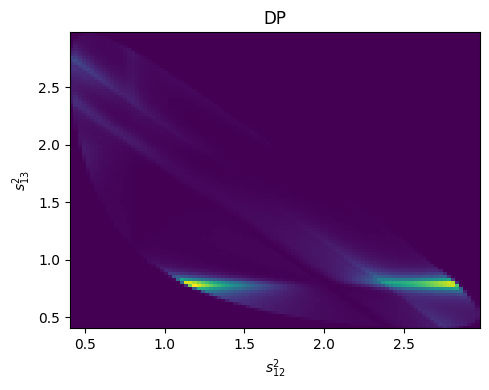

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist2d(s12Sqs13Sqs23Sq[:,0], s12Sqs13Sqs23Sq[:,1], 100)
ax.set_xlabel(r"$s_{12}^2$")
ax.set_ylabel(r"$s_{13}^2$")
ax.set_title('DP')
fig.tight_layout()

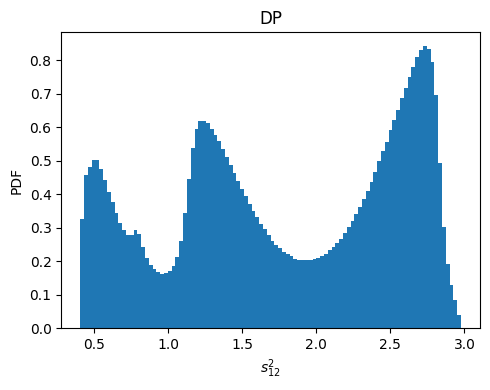

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(s12Sqs13Sqs23Sq[:,0], 100, density = True)
ax.set_xlabel(r"$s_{12}^2$")
ax.set_ylabel(r"PDF")
ax.set_title('DP')
fig.tight_layout()

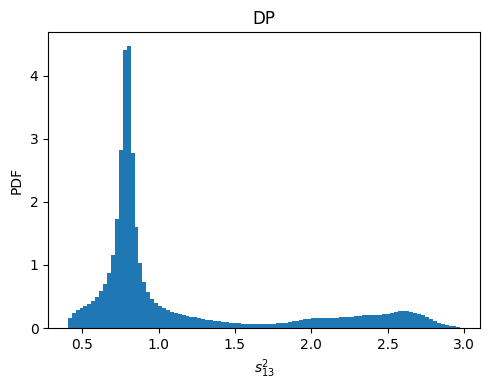

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(s12Sqs13Sqs23Sq[:,1], 100, density = True)
ax.set_xlabel(r"$s_{13}^2$")
ax.set_ylabel(r"PDF")
ax.set_title('DP')
fig.tight_layout()

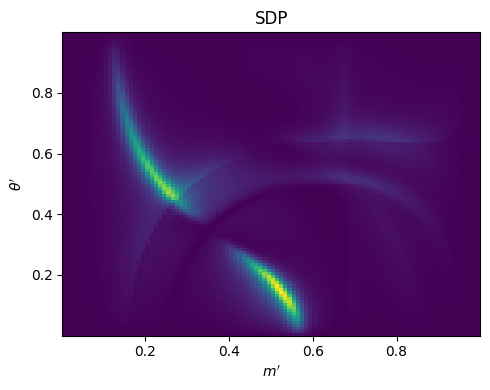

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist2d(mp_thetap[:,0], mp_thetap[:,1], 100)
ax.set_xlabel(r"$m'$")
ax.set_ylabel(r"$\theta'$")
ax.set_title('SDP')
fig.tight_layout()

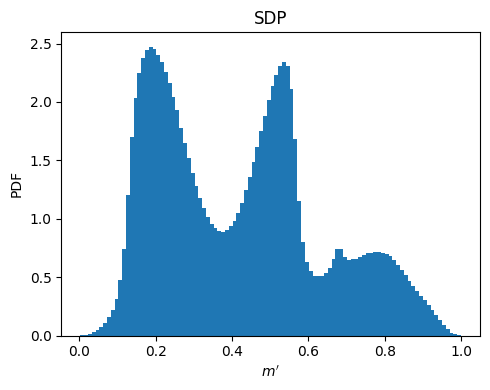

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(mp_thetap[:,0], 100, density = True)
ax.set_xlabel(r"$m'$")
ax.set_ylabel(r"PDF")
ax.set_title('SDP')
fig.tight_layout()

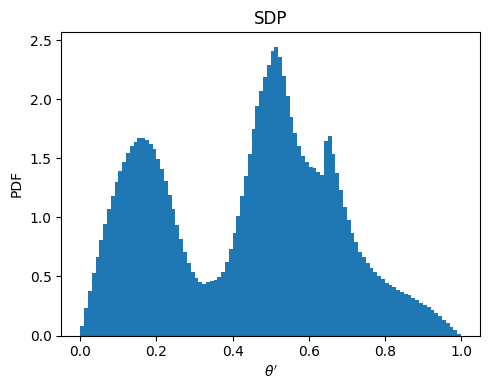

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(mp_thetap[:,1], 100, density = True)
ax.set_xlabel(r"$\theta'$")
ax.set_ylabel(r"PDF")
ax.set_title('SDP')
fig.tight_layout()

In [ ]:
import math

class SquareDalitzPlot:
    def __init__(self):
        
        self.mMin_ = [0.0, 0.0, 0.0]  # Replace with appropriate values
        self.mDiff_ = [0.0, 0.0, 0.0]  # Replace with appropriate values
        self.mPrime_ = 0.0
        self.thetaPrime_ = 0.0
        self.m12Sq_ = 0.0
        self.m13Sq_ = 0.0
        self.m23Sq_ = 0.0
        self.m1Sq_ = 0.0
        self.m2Sq_ = 0.0
        self.m3Sq_ = 0.0
        self.mParentSq_ = 0.0
        self.p1Cms12 = 0.0
        self.p3Cms12 = 0.0
        self.p1_Parent_ = 0.0
        self.p2_Parent_ = 0.0
        self.p3_Parent_ = 0.0
        self.c12_ = 0.0
        self.c23_ = 0.0
        self.c13_ = 0.0
        self.p1_12_ = 0.0
        self.p3_12_ = 0.0
        self.p2_23_ = 0.0
        self.p1_23_ = 0.0
        self.p1_13_ = 0.0
        self.p2_13_ = 0.0
        self.qi_ = 0.0
        self.qk_ = 0.0
        self.warnings_ = False

    def calcSqDPVars(self):
        # For given m_12 and cos(theta_12) values, calculate m' and theta' for the square Dalitz plot
        value = (2.0 * (self.m12_ - self.mMin_[2]) / self.mDiff_[2]) - 1.0
        self.mPrime_ = math.acos(value) / math.pi
        self.thetaPrime_ = math.acos(self.c12_) / math.pi
        # Sometimes events are assigned exactly thetaPrime = 0.0 or 1.0
        # which gives problems with efficiency and other histograms
        if self.thetaPrime_ == 0.0:
            self.thetaPrime_ += 1.0e-10
        elif self.thetaPrime_ == 1.0:
            self.thetaPrime_ -= 1.0e-10

    def calcSqDPJacobian(self, mPrime=None, thPrime=None):
        if mPrime is None:
            mPrime = self.mPrime_
        if thPrime is None:
            thPrime = self.thetaPrime_
        # Calculate the Jacobian for the transformation
        # m23^2, m13^2 -> m', theta' (square DP)
        m12 = 0.5 * self.mDiff_[2] * (1.0 + math.cos(math.pi * mPrime)) + self.mMin_[2]
        m12Sq = m12 * m12

        e1Cms12 = (m12Sq - self.m2Sq_ + self.m1Sq_) / (2.0 * m12)
        e3Cms12 = (self.mParentSq_ - m12Sq - self.m3Sq_) / (2.0 * m12)

        p1Cms12 = self.pCalc(e1Cms12, self.m1Sq_)
        p3Cms12 = self.pCalc(e3Cms12, self.m3Sq_)

        deriv1 = math.pi / 2 * self.mDiff_[2] * math.sin(math.pi * mPrime)
        deriv2 = math.pi * math.sin(math.pi * thPrime)

        jacobian = 4.0 * p1Cms12 * p3Cms12 * m12 * deriv1 * deriv2

        return jacobian

    def updateMassSquares(self, m13Sq, m23Sq):
        self.m13Sq_ = m13Sq
        if self.m13Sq_ > 0.0:
            self.m13_ = math.sqrt(self.m13Sq_)
        else:
            self.m13_ = 0.0

        self.m23Sq_ = m23Sq
        if self.m23Sq_ > 0.0:
            self.m23_ = math.sqrt(self.m23Sq_)
        else:
            self.m23_ = 0.0

        # Now calculate m12Sq and m12.
        self.calcm12Sq()

        # Calculate momenta of tracks in parent (B, D etc.) rest-frame
        self.calcParentFrameMomenta()

    def calcParentFrameMomenta(self):
        e1 = (self.mParentSq_ + self.m1Sq_ - self.m23Sq_) / (2.0 * self.mParent_)
        e2 = (self.mParentSq_ + self.m2Sq_ - self.m13Sq_) / (2.0 * self.mParent_)
        e3 = (self.mParentSq_ + self.m3Sq_ - self.m12Sq_) / (2.0 * self.mParent_)

        self.p1_Parent_ = self.pCalc(e1, self.m1Sq_)
        self.p2_Parent_ = self.pCalc(e2, self.m2Sq_)
        self.p3_Parent_ = self.pCalc(e3, self.m3Sq_)

    def calcHelicities(self):
        # Calculate helicity angle cosines, given m12Sq, m13Sq and m23Sq.
        # cij_ is the cosine of the helicity angle in the rest frame of the
        # system of particles i and j.
        # It is (but note the caveat below) the angle between tracks i and k
        # in the ij rest frame with indices permuted cyclically.
        # However, it is important to note that it is not exactly a cyclic
        # permutation (there is a special treatment for c23 inside the cFromM
        # function) for reasons of preserving the symmetry about m13=m23 for
        # symmetric final states.
        # The precise definitions are:
        # theta12 is defined as the angle between 1&3 in the rest frame of 1&2
        # theta23 is defined as the angle between 3&1 in the rest frame of 2&3
        # theta13 is defined as the angle between 3&2 in the rest frame of 1&3
        #
        # It is a prerequisite that all mij_ and mijSq_ variables be correctly set.

        zero, one, two = 0, 1, 2

        self.c12_ = self.cFromM(self.m12Sq_, self.m13Sq_, self.m12_, zero, one, two)
        self.p1_12_ = self.qi_
        self.p3_12_ = self.qk_  # i, j = 12 (rest frame), k = 3
        self.c23_ = self.cFromM(self.m23Sq_, self.m12Sq_, self.m23_, one, two, zero)
        self.p2_23_ = self.qi_
        self.p1_23_ = self.qk_  # i, j = 23 (rest frame), k = 1
        self.c13_ = self.cFromM(self.m13Sq_, self.m23Sq_, self.m13_, two, zero, one)
        self.p1_13_ = self.qi_
        self.p2_13_ = self.qk_  # i, j = 31 (rest frame), k = 2

    def cFromM(self, mijSq, mikSq, mij, i, j, k):
        # Routine to calculate the cos(helicity) variables from the masses of the particles.
        # (See comment in LauKinematics::calcHelicities for futher information.)

        EiCmsij = (mijSq - self.mSq_[j] + self.mSq_[i]) / (2.0 * mij)
        EkCmsij = (self.mParentSq_ - mijSq - self.mSq_[k]) / (2.0 * mij)

        if EiCmsij < self.mass_[i]:
            if self.warnings_:
                print("WARNING in LauKinematics::cFromM : EiCmsij =", EiCmsij, "too small < mass_[", i, "] =", self.mass_[i], "in cFromM, i, j, k =", i, ",", j, ",", k,)
                print("                                 : mijSq =", mijSq, "; mij =", mij, "; mSq_[", j, "] =", self.mSq_[j], "; mSq_[", i, "] =", self.mSq_[i],)
            return 0.0
        if EkCmsij < self.mass_[k]:
            if self.warnings_:
                print("WARNING in LauKinematics::cFromM : EkCmsij =", EkCmsij, "too small < mass_[", k, "] =", self.mass_[k], "in cFromM, i, j, k =", i, ",", j, ",", k,)
                print("                                 : mijSq =", mijSq, "; mij =", mij, "; mSq_[", j, "] =", self.mSq_[j], "; mSq_[", i, "] =", self.mSq_[i],)
            return 0.0

        # Find track i and k momenta in ij rest frame
        self.qi_ = self.pCalc(EiCmsij, self.mSq_[i])
        self.qk_ = self.pCalc(EkCmsij, self.mSq_[k])

        # Find ij helicity angle
        cosHel = -(mikSq - self.mSq_[i] - self.mSq_[k] - 2.0 * EiCmsij * EkCmsij) / (
            2.0 * self.qi_ * self.qk_
        )

        if cosHel > 1.0:
            cosHel = 1.0
        elif cosHel < -1.0:
            cosHel = -1.0

        return cosHel

    def pCalc(self, e, mSq):
        # Calculate momentum of a track, given its energy and mass squared.
        pSq = e * e - mSq
        if pSq > 0.0:
            return math.sqrt(pSq)
        else:
            return 0.0

    def calcm12Sq(self):
        self.m12Sq_ = self.mParentSq_ + self.m1Sq_ + self.m2Sq_ + self.m3Sq_ - self.m13Sq_ - self.m23Sq_

    def setParentMass(self, mParent):
        self.mParent_ = mParent
        self.mParentSq_ = mParent * mParent

    def setParticleMasses(self, m1, m2, m3):
        self.m1_ = m1
        self.m2_ = m2
        self.m3_ = m3
        self.m1Sq_ = m1 * m1
        self.m2Sq_ = m2 * m2
        self.m3Sq_ = m3 * m3

    def setMassRange(self, mMin1, mMin2, mMin3, mDiff1, mDiff2, mDiff3):
        self.mMin_[0] = mMin1
        self.mMin_[1] = mMin2
        self.mMin_[2] = mMin3
        self.mDiff_[0] = mDiff1
        self.mDiff_[1] = mDiff2
        self.mDiff_[2] = mDiff3

    def setWarnings(self, enableWarnings):
        self.warnings_ = enableWarnings


In [ ]:
# Convert to square Dalitz variables

void LauKinematics::calcSqDPVars()
    {
            // For given m_12 and cos(theta_12) values, calculate m' and theta' for the square Dalitz plot
            Double_t value = (2.0*(m12_ - mMin_[2])/mDiff_[2]) - 1.0;
            mPrime_ = LauConstants::invPi*TMath::ACos(value);
            thetaPrime_ = LauConstants::invPi*TMath::ACos(c12_);
            // Sometimes events are assigned exactly thetaPrime = 0.0 or 1.0
            // which gives problems with efficiency and other histograms
            if (thetaPrime_ == 0.0)
            {
                    thetaPrime_ += 1.0e-10;
            } else if (thetaPrime_ == 1.0)
            {
                    thetaPrime_ -= 1.0e-10;
            }
    }
    
    Double_t LauKinematics::calcSqDPJacobian() const
    {
            return this->calcSqDPJacobian(mPrime_,thetaPrime_);
    }
    
    Double_t LauKinematics::calcSqDPJacobian(const Double_t mPrime, const Double_t thPrime) const
    {
            // Calculate the Jacobian for the transformation 
            // m23^2, m13^2 -> m', theta' (square DP)
            const Double_t m12 = 0.5*mDiff_[2]*(1.0 + TMath::Cos(LauConstants::pi*mPrime)) + mMin_[2];
            const Double_t m12Sq = m12*m12;
    
            const Double_t e1Cms12 = (m12Sq - m2Sq_ + m1Sq_)/(2.0*m12);
            const Double_t e3Cms12 = (mParentSq_ - m12Sq - m3Sq_)/(2.0*m12);
    
            const Double_t p1Cms12 = this->pCalc(e1Cms12, m1Sq_);
            const Double_t p3Cms12 = this->pCalc(e3Cms12, m3Sq_);
    
            const Double_t deriv1 = LauConstants::piBy2*mDiff_[2]*TMath::Sin(LauConstants::pi*mPrime);
            const Double_t deriv2 = LauConstants::pi*TMath::Sin(LauConstants::pi*thPrime);
    
            const Double_t jacobian = 4.0*p1Cms12*p3Cms12*m12*deriv1*deriv2;
    
            return jacobian;
    }
    
    void LauKinematics::updateMassSquares(const Double_t m13Sq, const Double_t m23Sq)
    {
            m13Sq_ = m13Sq;
            if (m13Sq_ > 0.0) {
                    m13_ = TMath::Sqrt(m13Sq_);
            } else {
                    m13_ = 0.0;
            }
    
            m23Sq_ = m23Sq;
            if (m23Sq_ > 0.0) {
                    m23_ = TMath::Sqrt(m23Sq_);
            } else {
                    m23_ = 0.0;
            }
    
            // Now calculate m12Sq and m12.
            this->calcm12Sq();
    
            // Calculate momenta of tracks in parent (B, D etc.) rest-frame
            this->calcParentFrameMomenta();
void LauKinematics::calcParentFrameMomenta()
    {
            Double_t e1 = (mParentSq_ + m1Sq_ - m23Sq_) / (2.0*mParent_);
            Double_t e2 = (mParentSq_ + m2Sq_ - m13Sq_) / (2.0*mParent_);
            Double_t e3 = (mParentSq_ + m3Sq_ - m12Sq_) / (2.0*mParent_);
    
            p1_Parent_ = this->pCalc(e1, m1Sq_);
            p2_Parent_ = this->pCalc(e2, m2Sq_);
            p3_Parent_ = this->pCalc(e3, m3Sq_);
    }
    
void LauKinematics::calcHelicities()
    {
            // Calculate helicity angle cosines, given m12Sq, m13Sq and m23Sq.
            // cij_ is the cosine of the helicity angle in the rest frame of the
            // system of particles i and j.
            // It is (but note the caveat below) the angle between tracks i and k
            // in the ij rest frame with indices permuted cyclically.
            // However, it is important to note that it is not exactly a cyclic
            // permutation (there is a special treatment for c23 inside the cFromM
            // function) for reasons of preserving the symmetry about m13=m23 for
            // symmetric final states.
            // The precise definitions are:
            // theta12 is defined as the angle between 1&3 in the rest frame of 1&2
            // theta23 is defined as the angle between 3&1 in the rest frame of 2&3
            // theta13 is defined as the angle between 3&2 in the rest frame of 1&3
            //
            // It is a prerequisite that all mij_ and mijSq_ variables be correctly set.
    
            Int_t zero(0), one(1), two(2);
    
            c12_ = cFromM(m12Sq_, m13Sq_, m12_, zero, one, two);
            p1_12_ = qi_; p3_12_ = qk_; // i, j = 12 (rest frame), k = 3
            c23_ = cFromM(m23Sq_, m12Sq_, m23_, one, two, zero);
            p2_23_ = qi_; p1_23_ = qk_; // i, j = 23 (rest frame), k = 1
            c13_ = cFromM(m13Sq_, m23Sq_, m13_, two, zero, one);
            p1_13_ = qi_; p2_13_ = qk_; // i, j = 31 (rest frame), k = 2
    
    }
    
    Double_t LauKinematics::cFromM(const Double_t mijSq, const Double_t mikSq, const Double_t mij, const Int_t i, const Int_t j, const Int_t k) const
    {
            // Routine to calculate the cos(helicity) variables from the masses of the particles.
            // (See comment in LauKinematics::calcHelicities for futher information.)
    
            Double_t EiCmsij = (mijSq - mSq_[j] + mSq_[i])/(2.0*mij);
            Double_t EkCmsij = (mParentSq_ - mijSq - mSq_[k])/(2.0*mij);
    
            if (EiCmsij < mass_[i]) {
                    if (warnings_) {
                            std::cerr<<"WARNING in LauKinematics::cFromM : EiCmsij = "<<EiCmsij<<" too small < mass_["<<i<<"] = "<<mass_[i]<<" in cFromM, i, j, k = "<<i<<", "<<j<<", "<<k<<std::endl;
                            std::cerr<<"                                 : mijSq = "<<mijSq<<"; mij = "<<mij<<"; mSq_["<<j<<"] = "<<mSq_[j]<<"; mSq_["<<i<<"] = "<<mSq_[i]<<std::endl;
                    }
                    return 0.0;
            }
            if (EkCmsij < mass_[k]) {
                    if (warnings_) {
                            std::cerr<<"WARNING in LauKinematics::cFromM : EkCmsij = "<<EkCmsij<<" too small < mass_["<<k<<"] = "<<mass_[k]<<" in cFromM, i, j, k = "<<i<<", "<<j<<", "<<k<<std::endl;
                            std::cerr<<"                                 : mijSq = "<<mijSq<<"; mij = "<<mij<<"; mSq_["<<j<<"] = "<<mSq_[j]<<"; mSq_["<<i<<"] = "<<mSq_[i]<<std::endl;
                    }
                    return 0.0;
            }
    
            // Find track i and k momenta in ij rest frame
            qi_ = this->pCalc(EiCmsij, mSq_[i]);
            qk_ = this->pCalc(EkCmsij, mSq_[k]);
    
            // Find ij helicity angle
            Double_t cosHel = -(mikSq - mSq_[i] - mSq_[k] - 2.0*EiCmsij*EkCmsij)/(2.0*qi_*qk_);
    
            if (cosHel > 1.0) {
                    cosHel = 1.0;
            } else if (cosHel < -1.0) {
                    cosHel = -1.0;
            }
    
            if (i == 1) {cosHel *= -1.0;}
    
            return cosHel;
    }